<a target="_blank" href="https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/w2024/Course_Notes/Week%204/Week4_Intro_to_Overfitting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

import matplotlib
import matplotlib.pyplot as plt

### **Regularization and Overfitting - Introduction**

In the last [code](https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/w2024/Course_Notes/Week%203/Week_3_Linear_Regression.ipynb) lecture we saw that when we consider a high degree order polynomial regression model, there was a significant variation/oscillation in the prediction and it did not generalized when we predict beyong the trainig data regime. 
A possible reason is because the polynomial is too complex compared to the amount of data, $d >> N$. <br>
In application, this can be avoided by:

1. **Conditioning of the Problem**: High-degree polynomials can cause numerical instability and poor conditioning, leading to large oscillations in the fit.

2. **Data Scaling**: Scaling both `x` and `y` data to a smaller range can improve the condition of the polynomial fitting and potentially reduce numerical errors.

3. **Regularization**: Regularization techniques like reducing the polynomial degree can limit model complexity, but are less straightforward in polynomial fitting compared to linear models.


> It is important to condition and regularize the data to avoid **overfitting** or **underfitting** the polynominal.


<br>

<a href="https://github.com/RodrigoAVargasHdz/CHEM-4PB3" target="_blank">
  <img src="https://raw.githubusercontent.com/RodrigoAVargasHdz/CHEM-4PB3/Volume-2/Assests/overfitting_underfitting_graphs.png" alt="Visualizing LogP" width="700">
</a>
<br>
</a>

**Figure 3 - Illustrating Overfitting versus Underfitting. Image by Rudra Sondhi.**

<br>


>#### **Learn More:**
1. **What is Overfitting in Deep Learning**: [Educational Resource](https://www.v7labs.com/blog/overfitting)
2. **Regularization in Machine Learning (with Code Examples)**: [Example Application](https://www.dataquest.io/blog/regularization-in-machine-learning/)
3. **Polynomial Regression**: [Educational Resource](https://medium.com/analytics-vidhya/polynomial-regression-%EF%B8%8F-e0e20bfbe9d5)


## **The Challenge of Overfitting**

- **Risk in Flexibility**:  Higher-degree polynomials might fit the training data too precisely, capturing noise rather than the underlying trend, a phenomenon known as overfitting.
- **Consequences**: An overfitted model performs poorly on new, unseen data, rendering it less effective for predictive purposes.

<br>

### **Regularization: A Key Solution**

Regularization addresses the challenge of overfitting by introducing constraints into the model fitting process. It penalizes the complexity of the model, encouraging simpler models that are more likely to generalize well. <br>
One of the possible loss or error functions that considers a penalization term is,
$$
  \cal{L}(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{N} \left( f(\mathbf{x}_i) - y_i \right)^2 = \frac{1}{2} \sum_{i=1}^{N} \left( \mathbf{w}^\top \mathbf{x}_i - y_i \right)^2  + \frac{\lambda}{2}\sum_{i=1}^{d} w_i^2
$$
$$
  \cal{L}(\mathbf{w}) = \frac{1}{2} \left (\mathbf{y} - \mathbf{X} \mathbf{w} \right)^\top \left (\mathbf{y} - \mathbf{X}\mathbf{w} \right) + \frac{\lambda}{2}\| \mathbf{w}\|^2,
$$
where $\| \mathbf{w}\|^2 = \mathbf{w}^\top\mathbf{w} = \sum_{i}^N w_i^2$, and $\lambda$ is known as the **regularization parameter**.

Following the same protocol where we use,
$$
 \nabla {\cal L}(\mathbf{w}) \Big\rvert_{\mathbf{w}^{*}} = 0
$$
to solve for for the optimal value of $\mathbf{w}$, we get,
$$
 \boldsymbol{\theta}^{*}(\lambda) = \left ( \mathbf{X}^{\top} \mathbf{X}  + \lambda \mathbb{I}\right)^{-1} \mathbf{X}^{\top}\mathbf{y}.
$$
$\mathbb{I}$ is the identity matrix, a matrix full of zeros except the diagonal values are equal to one.

<br>

The avobe procedure can also be applied to a polynomial model, 
$$
\phi(\mathbf{x}) = [1, x_1, x_2, x_3, \cdots, x_i x_j, \cdots, x_i^{ m} x_j^{p}, \cdots, x_i^{ m} x_j^{p}x_{\ell}^{r}].
$$

- **Formula and Implementation**: The optimal parameters for a regularized polynomial model can be computed using the formula:
  - $\boldsymbol{\theta}^{*}(\lambda) = \left ( \mathbf{\Phi}(\mathbf{X})^{\top} \mathbf{\Phi}(\mathbf{X})  + \lambda \mathbb{I}\right)^{-1} \mathbf{\Phi}(\mathbf{X})^{\top}\mathbf{y}$. 
- **Balancing Act**: The regularization parameter $\lambda$ plays a crucial role in balancing the model's complexity against its ability to generalize. It determines the extent to which the model's complexity is penalized, impacting both bias and variance.
- **The parameter $\boldsymbol{\theta} \$:** In the context of regularization are the coefficients of the model that are adjusted to minimize the penalty imposed by regularization.

> **Library:** [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from `Sklearn`.

# Coding #
* Using the previous code, let's revisit the optimization of the same problem for different values of $\lambda$.
  

In [2]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N, bool_biased=True):
    # This creates an array x of N linearly spaced values between -1 and 1.
    x = np.linspace(-1., 1., N)
    y = np.sin(.5*x) + x - 1.
    # Adds random noise to each y value.
    y = y + np.random.uniform(low=0., high=0.5, size=x.shape)
    if bool_biased:
        X = np.column_stack((np.ones_like(x), x))
    else:
        X = x[:, None]
    return X, y


In [3]:
def polynomial_features(X, deg):
    poly = PolynomialFeatures(deg)
    Phi = poly.fit_transform(X)
    return Phi

In [4]:
def polynomial_model_solver(X, y, deg, l=1E-2):
    Phi = polynomial_features(X, deg)
    A = Phi.T@Phi + l * np.eye(Phi.shape[1], Phi.shape[1])
    w = np.linalg.inv(A)@(Phi.T@y)
    # w = linear_model_solver(Phi,y)
    return w

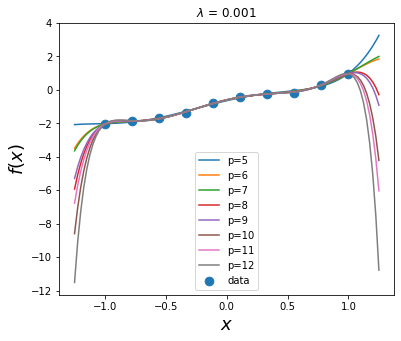

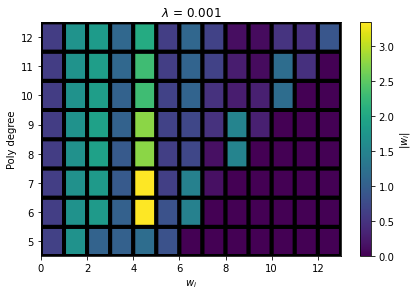

In [22]:
#last's lecture example

l = 1E-3 # regularization parameter
N = 10 # number of training data

X, y = get_data(N, False)
x_grid = np.linspace(-1.25, 1.25, 100)[:, None] # prediction grid

fig, ax = plt.subplots(figsize=(6, 5))

w_ = []  # to save the number of parameters
p_ = np.arange(5, 13, 1, dtype=np.int32)  # polynomial degrees
for p in p_:  # loop over different degrees
    w = polynomial_model_solver(X, y, p, l)
    Phi = polynomial_features(x_grid, p)
    y_pred = Phi@w

    plt.plot(x_grid, y_pred, label='p=%s' % p)
    w_.append(np.pad(w, (0, 13-w.shape[0]),
              mode='constant', constant_values=0))
plt.scatter(X[:, -1], y, s=75, label='data')
plt.title(r'$\lambda$ = ' + f'%.3f'%(l))
plt.legend(fontsize=10)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
# plt.savefig('Figures/polyfit_2.png',dpi=1800)

fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolor(np.abs(np.array(w_)), edgecolors='k', linewidths=4)
fig.colorbar(c, ax=ax0, label=r'$|w_i|$')
ax0.set_xlabel(r'$w_i$')
ax0.set_yticks(np.arange(p_.shape[0])+0.5, p_)
ax0.set_ylabel('Poly degree')
fig.tight_layout()
plt.title(r'$\lambda$ = ' + f'%.3f' % (l))
plt.show()

# Impact of the regularization term #

In [6]:
l_ = np.array([0., 1E-4, 1E-3, 1E-2, 1E-1, 1.])  # lambda
w_ = []
deg = 12
N = 10
X,y = get_data(N,False)
for l in l_:  # loop over variuos lambda
    w = polynomial_model_solver(X, y, deg, l)
    w_.append(w)  # list of optimal parameters

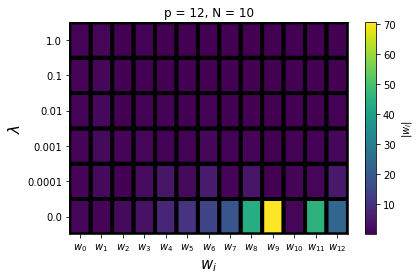

(-5.0, 5.0)

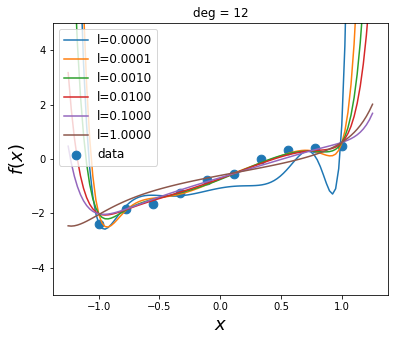

In [7]:
fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolor(np.abs(np.array(w_)), edgecolors='k', linewidths=4)
fig.colorbar(c, ax=ax0, label=r'$|w_i|$')
ax0.set_xlabel(r'$w_i$', fontsize=15)
theta_ticks = [r'$w_{%s}$' % i for i in range(len(w_[0]))]
ax0.set_xticks(np.arange(len(w_[0]))+0.5, theta_ticks, fontsize=10)
ax0.set_yticks(np.arange(l_.shape[0])+0.5, l_)
ax0.set_ylabel(r'$\lambda$', fontsize=15)
plt.title(f'p = %s, N = %s'%(deg,N))
fig.tight_layout()
plt.show()


X, y = get_data(N, False)
x_grid = np.linspace(-1.25, 1.25, 100)[:, None]  # prediction grid

fig, ax = plt.subplots(figsize=(6, 5))

for wi,li in zip(w_,l_):  # loop over different parameters
    Phi = polynomial_features(x_grid, deg)
    y_pred = Phi@wi

    plt.plot(x_grid, y_pred, label=f'l=%.4f' % li)
    w_.append(np.pad(w, (0, 13-w.shape[0]),
              mode='constant', constant_values=0))
plt.scatter(X[:, -1], y, s=75, label='data')
plt.title(f'deg = %s' % (deg))
plt.legend(fontsize=12)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
plt.ylim(-5,5)
# plt.savefig('Figures/polyfit_2.png',dpi=1800)

## Coefficient of determination $R^2$
(**homework**)\
$R^{2} = 1-\frac{SS_{res}}{SS_{tot}}$,\
where,\
$SS_{res} = \sum_{i} (y_i - f(x_i))^2$\
$SS_{tot} = \sum_{i} (y_i - \hat{y})^2$\
$\hat{y} = \frac{1}{N}\sum_i^{N} y_i$


In [8]:
# code here
def r_square(X,y,l,deg):
    
    # solve for theta
    w = polynomial_model_solver(X, y, deg, l)
    Phi = polynomial_features(X, deg)
    y_pred = Phi@w
    
    # compute ss_res 
    ss_res = np.sum((y_pred - y)**2)
    
    # compute ss_tot
    y_mean = np.mean(y)
    ss_tot = np.sum((y_pred - y_mean)**2)
    
    r2 = 1 - (ss_res/ss_tot)
    return r2

# Validation error vs training error # 
One of the reasons why regularization is key in model fitting is illustrated in the following exercise.
1. Split the data into training and validation, N total = 20, N training = 15, N validation = 5. 
2. Using the validation data, verified with model trained with different values of $\lambda$ has the lowest validation error. 

Let's use the root mean square error (RMSE), as the metric for the validation error. 



In [9]:
def rmse(prediction,target):
    diff = prediction - target
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    return rmse

In [38]:
deg = 12
N = 20
Ntr = 15
Nval = 5
Xtotal, ytotal = get_data(N,False) 


# split the data randomly into training and validation
i = np.arange(N)
i0 = np.random.permutation(i)
i0_tr = i0[:Ntr]
i0_val = i0[Ntr:]

X_tr, y_tr = Xtotal[i0_tr], ytotal[i0_tr]
X_val, y_val = Xtotal[i0_val], ytotal[i0_val]

In [39]:
l_ = np.array([0., 1E-4, 1E-3, 1E-2, 1E-1, 0.2,0.3,0.5,0.75 ,1.])  # lambda
w_ = []
rmse_tr_all = []
rmse_val_all = []
for l in l_:  # loop over various lambda
    # compute the rmse for training and validation for different values of lambda
    w = polynomial_model_solver(X_tr, y_tr,deg,l)
    Phi_tr = polynomial_features(X_tr, deg)
    y_pred_tr = Phi_tr@w
    rmse_tr = rmse(y_pred_tr,y_tr)
    
    Phi_val = polynomial_features(X_val, deg)
    y_pred_val = Phi_val@w   
    rmse_val = rmse(y_pred_val,y_val)
    
    rmse_tr_all.append(rmse_tr)
    rmse_val_all.append(rmse_val)

Text(0.5, 0, '$\\lambda$')

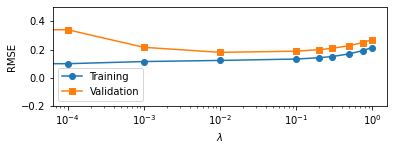

In [41]:
# plot the rmse validation vs the values of lambda 

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

ax.plot(l_, rmse_tr_all,marker='o',label = 'Training')
ax.plot(l_, rmse_val_all,marker='s',label = 'Validation')
ax.set_ylim(-0.2,0.5)

ax.set_xscale('log')
ax.set_ylabel('RMSE')
plt.legend()
ax.set_xlabel(r'$\lambda$')



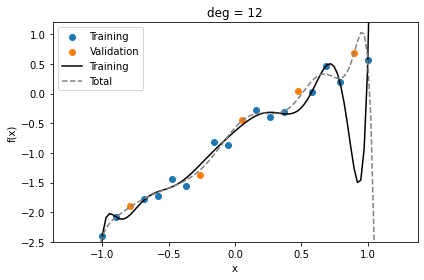

In [42]:
# l = 0.2 # best one
l = l_[np.argmin(rmse_val)]
x_grid = np.linspace(-1.25, 1.25, 100)[:, None]  # prediction grid
w = polynomial_model_solver(X_tr, y_tr,deg,l)
Phi_grid = polynomial_features(x_grid, deg)
y_pred = Phi_grid@w

w_all = polynomial_model_solver(Xtotal, ytotal, deg, l)
y_pred_all = Phi_grid@w_all

plt.title('deg = %s'%deg)
plt.scatter(X_tr,y_tr,label='Training')
plt.scatter(X_val,y_val,label='Validation')
plt.plot(x_grid, y_pred, c='k', label='Training')
plt.plot(x_grid, y_pred_all,ls='--',c='grey',label='Total')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-2.5,1.2)
plt.legend()
plt.tight_layout()
plt.show()

## [Additional reading](https://alexshtf.github.io/2024/01/25/Bernstein-Basis.html) ##


